In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import and Warehouse data

In [2]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
df1.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
df1.shape

(7043, 10)

In [5]:
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [6]:
df2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df2.shape

(7043, 11)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), object(10)
memory usage: 605.3+ KB


### Merging the dataset

In [9]:
df = df1.join(df2,how='outer') #merging both the datasets

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [13]:
df1 = pd.read_csv('TelcomCustomer-Churn.csv')

### Converting object datatype to categorical 

In [14]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
df.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
print(df.gender.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: i

### Converting categorical attributes to continuous

In [16]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null category
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null category
Churn               7043 non-null int64
dtypes: category(2), float64(1), int64(18)
me

### Handling missing values

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') 
df[df.TotalCharges.isna()].shape

(11, 21)

In [18]:
df['TotalCharges'] = df['TotalCharges'].fillna(0) #filling missing values with 0 

### Dropping column

In [19]:
df.drop(['customerID'], axis = 1,inplace=True) #CustomerID is dropped as it's irrelevant

# Data analysis & visualisation

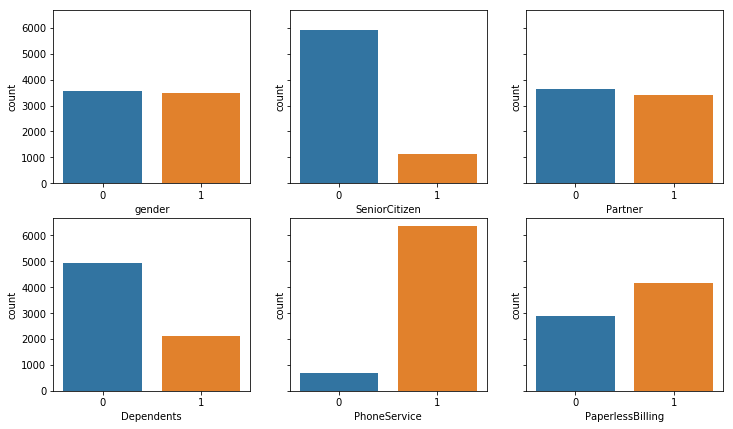

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

- Gender Distribution — About half of the customers in our data set are male while the other half are female.
- Senior Citizens — There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.
- Partner — About 50% of the customers have a partner.
- Dependent status — Only 30% of the total customers have dependents.
- Phone Service — About 90.3% of the customers have phone services.
- Paperless Billing— About 59.2% of the customers make paperless billing.

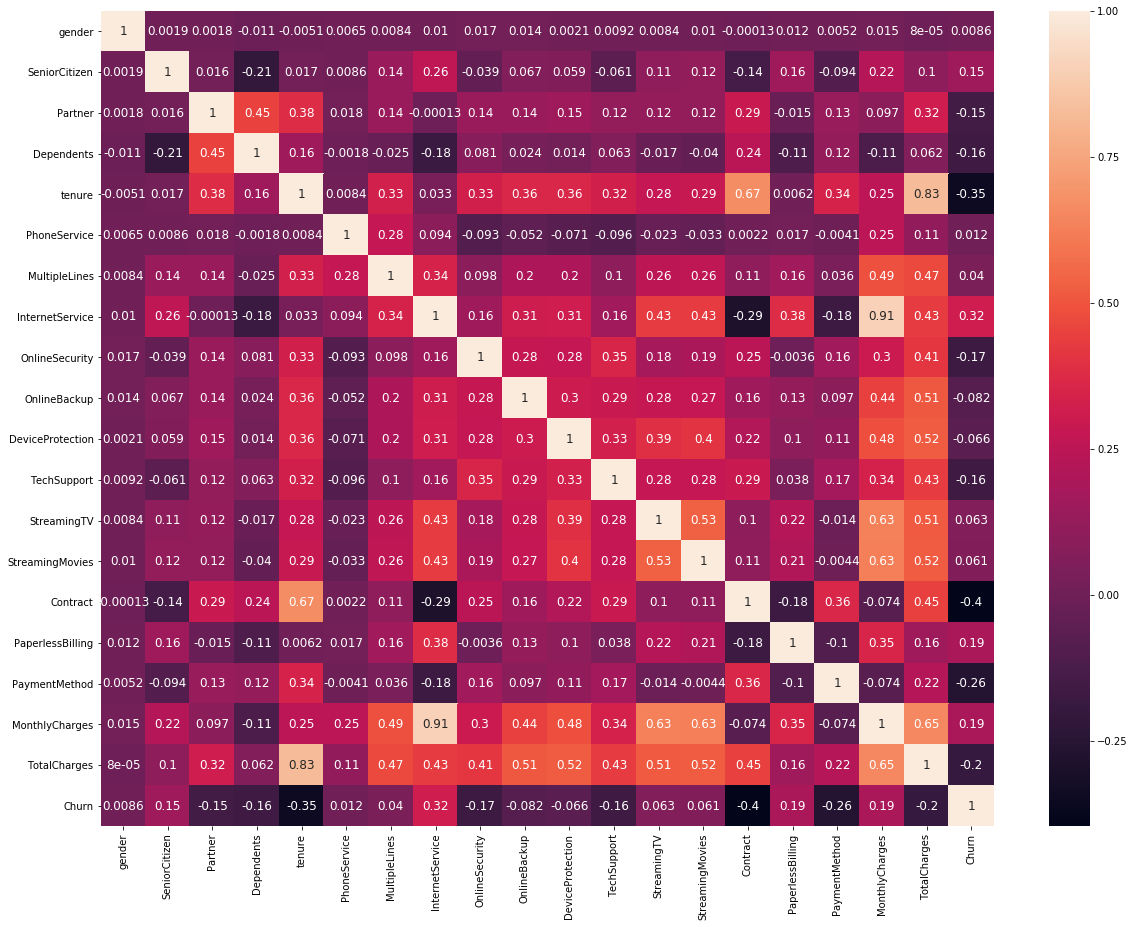

In [21]:
corr = df.corr() #correlation
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- Internet Services is moderately correlated to churn.
- Contract and Tenure are negatively correlated to churn. 
- Monthly Charges and PaperlessBilling are slightly correlated. 


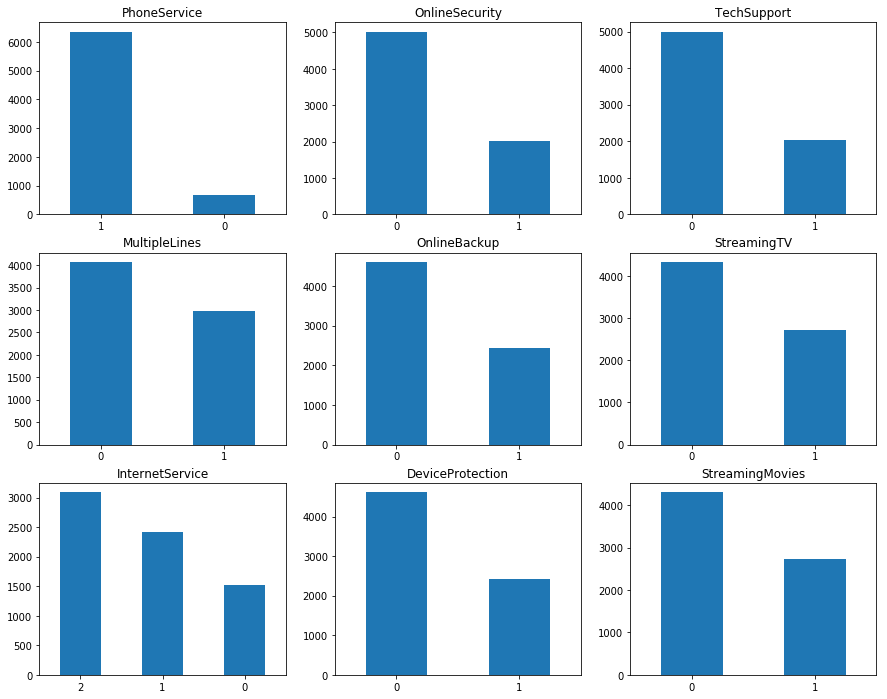

In [22]:
features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#colors1 =['#f45905','#c70d3a','#512c62']
#colors2 =['#94aa2a','#e47312','#d55252']
#colors3= ['#A04000','#D68910','#F7DC6F']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(features):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

- Most of the customers have phone services.
- About 60% of the customers have multiple lines. 
- Fibre Optics is the most among the internet services. 

# Online Security and Online Backup

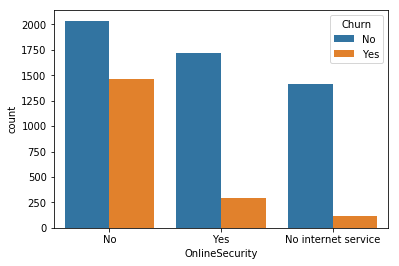

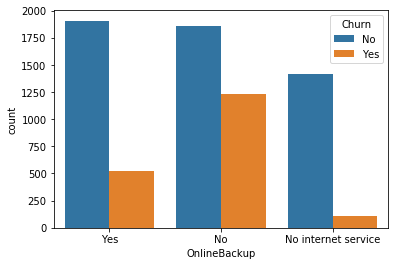

In [23]:
sns.countplot("OnlineSecurity", data=df1, hue = 'Churn');
plt.show()
sns.countplot("OnlineBackup", data=df1, hue = 'Churn');
plt.show()

- Churn is more with users who don't have Online Security and Online Backup. 

# Device Protection and Tech Support 

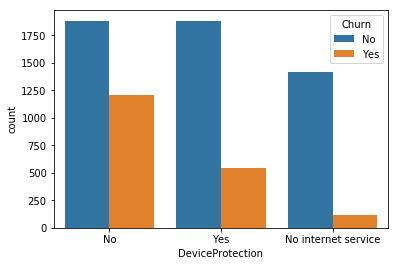

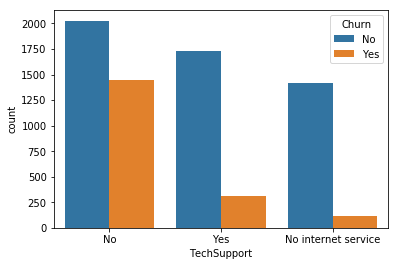

In [24]:
sns.countplot("DeviceProtection", data=df1, hue = 'Churn');
plt.show()
sns.countplot("TechSupport", data=df1, hue = 'Churn');

- Users without Tech Support and Device Protection are more likely to churn. 

# Streaming TV and Streaming Movies

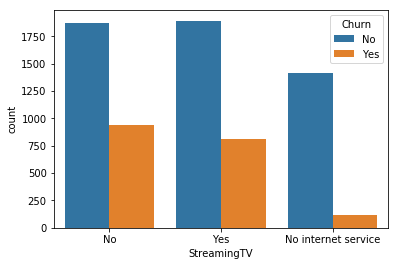

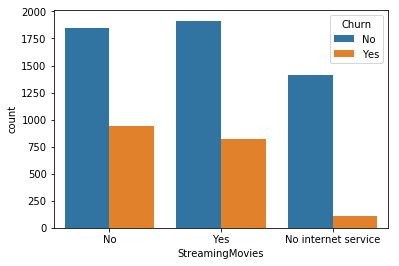

In [25]:
sns.countplot("StreamingTV", data=df1, hue = 'Churn');
plt.show()
sns.countplot("StreamingMovies", data=df1, hue = 'Churn');
plt.show()

- Streaming TV and Streaming Movies doesn't have any significant impact on churn. 

# Partner and Dependents:

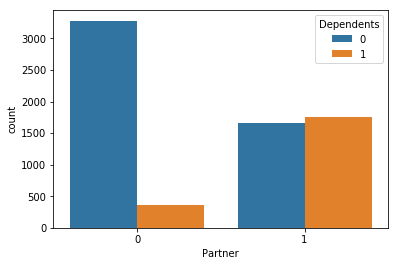

In [26]:
sns.countplot("Partner", data=df, hue = 'Dependents')

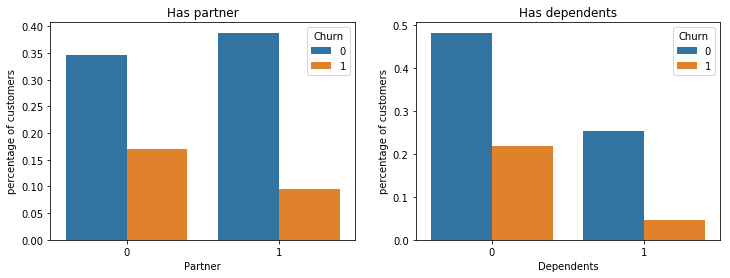

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"

gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])

gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

- Customer with partner is more likely to have dependents.
- Customers who don’t have partners are more likely to churn.Also, customers without dependents are also more likely to churn.

# Phone and Internet services

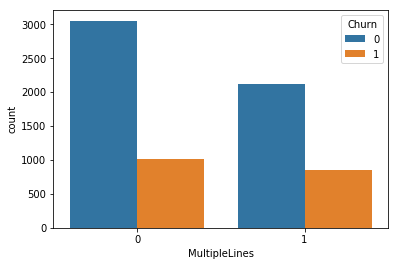

In [28]:
sns.countplot("MultipleLines", data=df, hue = 'Churn')


Customers with multiple lines have a slightly higher churn rate

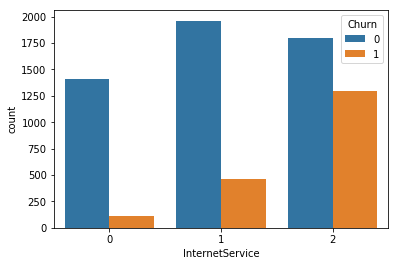

In [29]:
sns.countplot("InternetService", data=df, hue = 'Churn')

- Customers without internet have a very low churn rate
- Customers with fiber are more probable to churn than those with a DSL connection

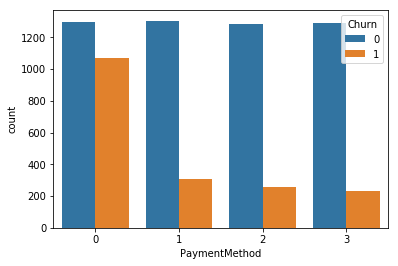

In [30]:
sns.countplot("PaymentMethod", data=df, hue = 'Churn')


- Electronic Check has most churn in Payment Method

# Monthly Charges

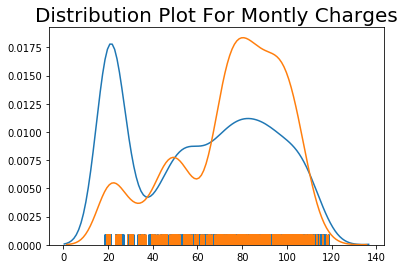

In [31]:
plt.title("Distribution Plot For Montly Charges",size=20);
target_0 = df.loc[df['Churn'] == 0]
target_1 = df.loc[df['Churn'] == 1]


sns.distplot(target_0[['MonthlyCharges']], hist=False, rug=True)
sns.distplot(target_1[['MonthlyCharges']], hist=False, rug=True)

plt.show()

- Users with higher monthly charges are also more likely to churn. 

# Total Charges

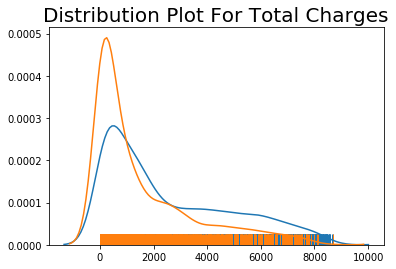

In [32]:
plt.title("Distribution Plot For Total Charges",size=20);
target_0 = df.loc[df['Churn'] == 0]
target_1 = df.loc[df['Churn'] == 1]


sns.distplot(target_0[['TotalCharges']], hist=False, rug=True)
sns.distplot(target_1[['TotalCharges']], hist=False, rug=True)

plt.show()

- TotalCharges have a similar distribution for both. 
- If monthly charges are less, churn rate is more. 

# Tenure 

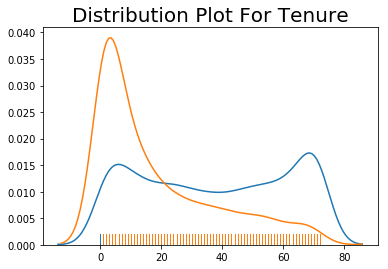

In [33]:
plt.title("Distribution Plot For Tenure",size=20);
target_0 = df.loc[df['Churn'] == 0]
target_1 = df.loc[df['Churn'] == 1]


sns.distplot(target_0[['tenure']], hist=False, rug=True)
sns.distplot(target_1[['tenure']], hist=False, rug=True)

plt.show()

- Low tenure users are more likely to churn.
### Multivariate Analysis

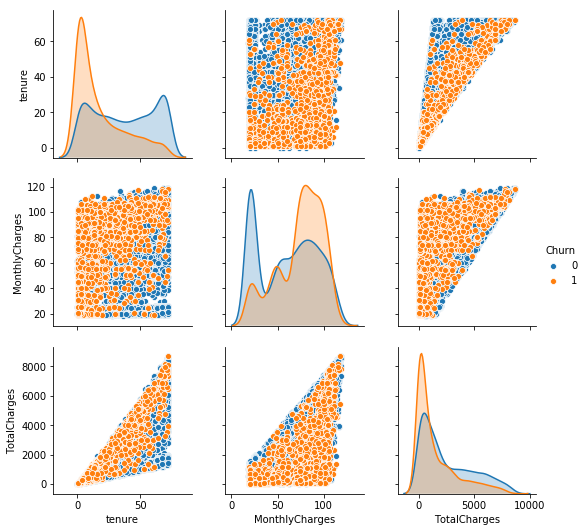

In [34]:
sns.pairplot(df, vars = df[['tenure','MonthlyCharges','TotalCharges']], hue ="Churn")

- Tenure and Total Charges are positively correlated
- Total Charges is right-skewed or postively skewed. 
- Users with higher monthly charges are more likely to churn.

# Target Variable: Churn

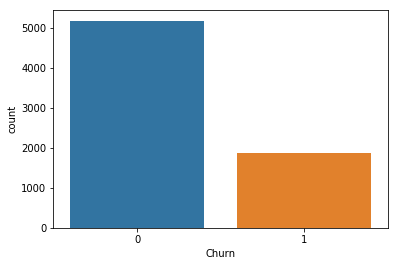

In [35]:
sns.countplot(df.Churn)

- About 26.2% of the total customers churn. 

# Data pre-processing

In [36]:
X = df.drop("Churn" , axis=1) #segregating predictors with target attributes
y = df["Churn"]

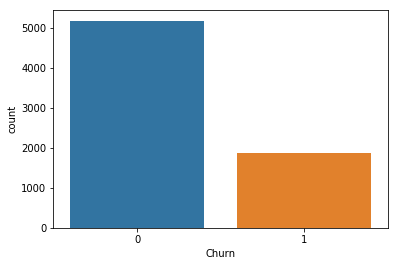

In [37]:
sns.countplot(y) # Checking for imbalance

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1) #train-test split

In [39]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.00000
mean,0.497160,0.162069,0.475862,0.293509,32.214807,0.903854,0.423327,1.223935,0.283976,0.340974,0.343002,0.286410,0.383976,0.392698,0.681542,0.593509,1.318256,64.791176,2274.60786
std,0.500043,0.368551,0.499468,0.455416,24.555738,0.294821,0.494136,0.780516,0.450971,0.474085,0.474760,0.452129,0.486401,0.488400,0.828830,0.491228,1.152736,30.127626,2270.61300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.400000,385.78750
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.400000,1388.97500
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3772.61250
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.650000,8684.80000


In [40]:
X_test.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.490771,0.162328,0.499763,0.313772,32.735920,0.901562,0.418363,1.220540,0.292948,0.353999,0.345954,0.299101,0.385234,0.376716,0.711311,0.589210,1.309513,64.692901,2291.695196
std,0.500033,0.368839,0.500118,0.464135,24.570155,0.297977,0.493407,0.775216,0.455223,0.478322,0.475791,0.457972,0.486766,0.484677,0.844966,0.492094,1.140171,30.009194,2258.351069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.150000,416.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.250000,1406.900000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,89.900000,3815.400000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8672.450000


In [41]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- By comparing the mean and other parameters, train and test data is similar to the original data. 

# Model training, testing and tuning:
# Decision Tree Model

In [42]:
dTree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   15.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [44]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
y_predict4 = dTree.predict(X_test)
print(classification_report(y_predict4,y_test))
cm=metrics.confusion_matrix(y_test, y_predict4,labels=[0, 1])

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1574
           1       0.60      0.59      0.59       539

    accuracy                           0.80      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.80      0.79      2113

0.8062880324543611
0.7950780880265026


# Ensemble Learning - Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


0.8144016227180527
0.8012304779933743
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1639
           1       0.55      0.61      0.58       474

    accuracy                           0.80      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.81      0.80      0.80      2113



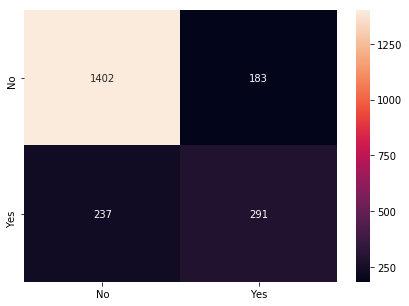

In [47]:
y_predict3 = bgcl.predict(X_test)

print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict3,labels=[0, 1])
print(classification_report(y_predict3,y_test))

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=50, random_state=None)
                                                        
                                                         
                                                         
                                                         
abcl = abcl.fit(X_train, y_train)

In [49]:
params = {'base_estimator__max_depth':[1,50],
          'base_estimator':[DecisionTreeClassifier(max_features=2), 
                            DecisionTreeClassifier(max_features=10)]}
gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params)
gs.fit(X,y)
print(gs.best_estimator_)

C:\Users\Pragnya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

0.8075050709939148
0.8088026502602934
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1663
           1       0.54      0.64      0.59       450

    accuracy                           0.81      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.82      0.81      0.81      2113



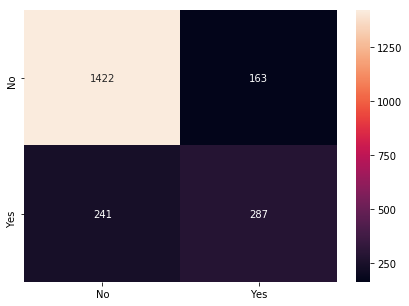

In [50]:
y_predict2 = abcl.predict(X_test)
print(abcl.score(X_train,y_train))
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict2,labels=[0, 1])
print(classification_report(y_predict2,y_test))

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1,min_samples_leaf= 30, min_samples_split= 1200)
gbcl = gbcl.fit(X_train, y_train)

In [52]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.best_params_

{'min_samples_leaf': 30, 'min_samples_split': 1200}

0.8099391480730224
0.8021769995267393
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1657
           1       0.54      0.62      0.58       456

    accuracy                           0.80      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.81      0.80      0.81      2113



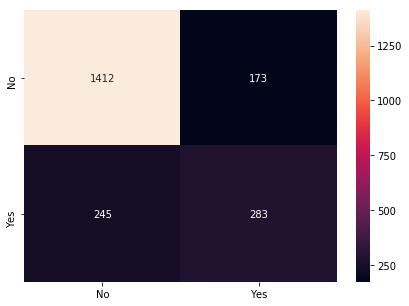

In [53]:
y_predict1 = gbcl.predict(X_test)

print(gbcl.score(X_train,y_train))
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict1,labels=[0, 1])

print(classification_report(y_predict1,y_test))

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
rf_Grid1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

rf_Grid1.fit(X_train,y_train)


In [ ]:
rf_Grid1.best_estimator_

0.8789046653144016
0.8088026502602934
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1639
           1       0.57      0.63      0.60       474

    accuracy                           0.81      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.82      0.81      0.81      2113



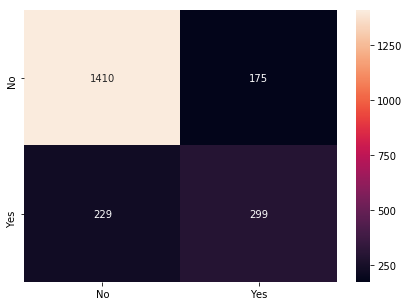

In [56]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

print(classification_report(y_predict,y_test))


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- AdaBoosting is selected as the final model.
- We have got 79.5%, 80.12%, 81.4%,80.2%,80.8% of accuracy from decision tree, bagging classifier, adaboost, gradientboost and random forest.
- By looking at the recall, Adaboost is selected as the best model which has the highest recall. 
- False positives are less in the Adaboost model among the models. 

### Pickle

In [57]:
import pickle  
Model = pickle.dumps(abcl) # Pickle the selected model for future use.

# GUI development

In [59]:
import tkinter as tk 
from tkinter import ttk 
  
# Creating tkinter window 
window = tk.Tk() 
window.geometry('750x700') 
# Label 
ttk.Label(window, text = "Gender (Male=0,Female=1) :",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 15, padx = 10, pady = 5) 
  
n = tk.StringVar() 
genderchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n) 
  
# Adding combobox drop down list 
genderchoosen['values'] = ('0','1') 
  
genderchoosen.grid(column = 1, row = 15) 
  
# Shows february as a default value 
genderchoosen.current(1)  






# Label 
ttk.Label(window, text = "Senior Citizen (No=0, Yes=1) :",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 16, padx = 10, pady = 5) 
  
n1 = tk.StringVar() 
seniorchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n1) 
  
# Adding combobox drop down list 
seniorchoosen['values'] = ('0','1') 
  
seniorchoosen.grid(column = 1, row = 16) 
  
# Shows february as a default value 
seniorchoosen.current(1)  



# Label 
ttk.Label(window, text = "Partner (No=0, Yes=1) :",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 17, padx = 10, pady = 5) 
  
n2 = tk.StringVar() 
partnerchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n2) 
  
# Adding combobox drop down list 
partnerchoosen['values'] = ('0','1') 
  
partnerchoosen.grid(column = 1, row = 17) 
  
# Shows february as a default value 
partnerchoosen.current(1) 


# Label 
ttk.Label(window, text = "Dependents (No=0, Yes=1) :",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 18, padx = 10, pady = 5) 
  
n3 = tk.StringVar() 
dependentchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n3) 
  
# Adding combobox drop down list 
dependentchoosen['values'] = ('0','1') 
  
dependentchoosen.grid(column = 1, row = 18) 
  
# Shows february as a default value 
dependentchoosen.current(1)  



# Label 
ttk.Label(window, text = "tenure:",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 19, padx = 10, pady = 5) 
  
n4 = tk.IntVar() 
tenurechoosen = ttk.Entry(window, width = 27,  
                            textvariable = n4) 
  
 
  
tenurechoosen.grid(column = 1, row = 19) 
  


    
# Label 
ttk.Label(window, text = "Phone Service (No=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 20, padx = 10, pady = 5) 
  
n5 = tk.StringVar() 
PhoneServicechoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n5) 

# Adding combobox drop down list 
PhoneServicechoosen['values'] = ('0','1')

  
PhoneServicechoosen.grid(column = 1, row = 20) 

# Shows february as a default value 
PhoneServicechoosen.current(1)  



# Label 
ttk.Label(window, text = "MultipleLines (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 21, padx = 10, pady = 5) 
  
n6 = tk.StringVar() 
MultipleLineschoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n6) 

# Adding combobox drop down list 
MultipleLineschoosen['values'] = ('0','1')

  
MultipleLineschoosen.grid(column = 1, row = 21) 

# Shows february as a default value 
MultipleLineschoosen.current(1) 



# Label 
ttk.Label(window, text = "Internet Service (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 22, padx = 10, pady = 5) 
  
n7 = tk.StringVar() 
InternetServicechoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n7) 

# Adding combobox drop down list 
InternetServicechoosen['values'] = ('0','1')

  
InternetServicechoosen.grid(column = 1, row = 22) 

# Shows february as a default value 
InternetServicechoosen.current(1) 



# Label 
ttk.Label(window, text = "Online Security (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 23, padx = 10, pady = 5) 
  
n8 = tk.StringVar() 
OnlineSecuritychoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n8) 

# Adding combobox drop down list 
OnlineSecuritychoosen['values'] = ('0','1')

  
OnlineSecuritychoosen.grid(column = 1, row = 23) 

# Shows february as a default value 
OnlineSecuritychoosen.current(1) 



# Label 
ttk.Label(window, text = "Online Backup (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 24, padx = 10, pady = 5) 
  
n9 = tk.StringVar() 
OnlineBackupchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n9) 

# Adding combobox drop down list 
OnlineBackupchoosen['values'] = ('0','1')

  
OnlineBackupchoosen.grid(column = 1, row = 24) 

# Shows february as a default value 
OnlineBackupchoosen.current(1) 


# Label 
ttk.Label(window, text = "Device Protection (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 25, padx = 10, pady = 5) 
  
n10 = tk.StringVar() 
DeviceProtectionchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n10) 

# Adding combobox drop down list 
DeviceProtectionchoosen['values'] = ('0','1')

  
DeviceProtectionchoosen.grid(column = 1, row = 25) 

# Shows february as a default value 
DeviceProtectionchoosen.current(1) 



# Label 
ttk.Label(window, text = "Tech Support (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 26, padx = 10, pady = 5) 
  
n11 = tk.StringVar() 
TechSupportchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n11) 

# Adding combobox drop down list 
TechSupportchoosen['values'] = ('0','1')

  
TechSupportchoosen.grid(column = 1, row = 26) 

# Shows february as a default value 
TechSupportchoosen.current(1)


# Label 
ttk.Label(window, text = "StreamingTV (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 27, padx = 10, pady = 5) 
  
n12 = tk.StringVar() 
StreamingTVchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n12) 

# Adding combobox drop down list 
StreamingTVchoosen['values'] = ('0','1')

  
StreamingTVchoosen.grid(column = 1, row = 27) 

# Shows february as a default value 
StreamingTVchoosen.current(1)



# Label 
ttk.Label(window, text = "Streaming Movie (No/No Internet=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 28, padx = 10, pady = 5) 
  
n13 = tk.StringVar() 
StreamingMoviechoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n13) 

# Adding combobox drop down list 
StreamingMoviechoosen['values'] = ('0','1')

  
StreamingMoviechoosen.grid(column = 1, row = 28) 

# Shows february as a default value 
StreamingMoviechoosen.current(1)



# Label 
ttk.Label(window, text = "Contract (Month-to-month=0, One year=1, Two year=2):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 29, padx = 10, pady = 5) 
  
n14 = tk.StringVar() 
Contractchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n14) 

# Adding combobox drop down list 
Contractchoosen['values'] = ('0','1','2')

  
Contractchoosen.grid(column = 1, row = 29) 

# Shows february as a default value 
Contractchoosen.current(1)



# Label 
ttk.Label(window, text = "Paperless Billing (No=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 30, padx = 10, pady = 5) 
  
n15 = tk.StringVar() 
PaperlessBillingchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n15) 

# Adding combobox drop down list 
PaperlessBillingchoosen['values'] = ('0','1')

  
PaperlessBillingchoosen.grid(column = 1, row = 30) 

# Shows february as a default value 
PaperlessBillingchoosen.current(1)



# Label 
ttk.Label(window, text = "Payment Method (No=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 31, padx = 10, pady = 5) 
  
n16 = tk.StringVar() 
PaymentMethodchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n16) 

# Adding combobox drop down list 
PaymentMethodchoosen['values'] = ('0','1')

  
PaymentMethodchoosen.grid(column = 1, row = 31) 

# Shows february as a default value 
PaymentMethodchoosen.current(1)




# Label 
ttk.Label(window, text = "Payment Method (Electronic check=0, Mailed check=1, Bank transfer=2, Credit card=3):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 32, padx = 10, pady = 5) 
  
n17 = tk.StringVar() 
PaymentMethodchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n17) 

# Adding combobox drop down list 
PaymentMethodchoosen['values'] = ('0','1','2','3')

  
PaymentMethodchoosen.grid(column = 1, row = 32) 

# Shows february as a default value 
PaymentMethodchoosen.current(1)




# Label 
ttk.Label(window, text = "Payment Method (No=0, Yes=1):",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 33, padx = 10, pady = 5) 
  
n18 = tk.StringVar() 
PaymentMethodchoosen = ttk.Combobox(window, width = 27,  
                            textvariable = n18) 

# Adding combobox drop down list 
PaymentMethodchoosen['values'] = ('0','1')

  
PaymentMethodchoosen.grid(column = 1, row = 33) 

# Shows february as a default value 
PaymentMethodchoosen.current(1)



# Label 
ttk.Label(window, text = "Monthly Charges:",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 34, padx = 10, pady = 5) 
  
n19 = tk.IntVar() 
MonthlyChargeschoosen = ttk.Entry(window, width = 27,  
                            textvariable = n19) 



  
MonthlyChargeschoosen.grid(column = 1, row = 34) 




# Label 
ttk.Label(window, text = "Total Charges:",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 35, padx = 10, pady = 5) 
  
n20 = tk.IntVar() 
TotalChargeschoosen = ttk.Entry(window, width = 27,  
                            textvariable = n20) 



  
TotalChargeschoosen.grid(column = 1, row = 35) 




# Label 
ttk.Label(window, text = "Submit:",  
        font = ("Times New Roman", 10)).grid(column = 0,  
        row = 36, padx = 10, pady = 5) 
  
n21 = tk.IntVar() 
Submitchoosen = ttk.Button(window, width = 27,  
                            textvariable = n21) 





window.mainloop() 

# Conclusion & Improvisation

- Adaboost is selected as the best ensembling technique for the given dataset among all the models. 
- Tenure, Contract, total and monthly charges are the features with higher importance. 
- Device Protection, Phone Service, Multiple Line are features which are not very important. 
- Though dataset consists of 26% of churn rate, distribution with more than 35% will help the model for better predictions.
- Collecting more data(quantity) will certainly help the machine learning model to give higher accuracy. 
- However, increasing volume or quantity may lead to increase in veracity. 
- Data points like complaints and date-time helps for better analysis and analyse the trend over time. 